## Álgebra Lineal
3) Implemente un algoritmo que realice la multiplicacion de dos matrices.


In [7]:
A = [[1, 0, 0],[5,1,0],[-2,3,1]]

B = [[4, -2, 1],
    [0, 3, 7],
    [0, 0, 2]]
def multiplicar_matrices(a, b):
    filas_a, columnas_a = len(a), len(a[0])
    filas_b, columnas_b = len(b), len(b[0])
    c = [[0] * columnas_b for _ in range(filas_a)]
    for i in range(filas_a):
        for j in range(columnas_b):
            for k in range(columnas_a):
                c[i][j] += a[i][k] * b[k][j]
    return c
AB = multiplicar_matrices(A, B)
print(AB)

[[4, -2, 1], [20, -7, 12], [-8, 13, 21]]


6)

In [11]:
import numpy as np
A = np.array([[3, -1, -1], [-1, 3, 1], [2, 1, 4]])
b = np.array([1, 3, 7])
x = np.array([0, 0, 0])
w = 1.2
max_iter = 1000
tol = 1e-6
for i in range(max_iter):
    x_prev = np.copy(x)
    for j in range(len(x)):
        x[j] = (1 - w) * x_prev[j] + (w / A[j, j]) * (b[j] - np.dot(A[j, :j], x[:j]) - np.dot(A[j, j+1:], x_prev[j+1:]))
    if np.linalg.norm(x - x_prev) < tol:
        print(f'Solución encontrada en {i} iteraciones:')
        print(x)
        break


Solución encontrada en 2 iteraciones:
[1 1 1]


7)

$A = \begin{pmatrix}
4 & -2 & 1 \\
20 & -7 & 12 \\
-8 & 13 & 17
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 0 \\
5 & 1 & 0 \\
-2 & 3 & 1
\end{pmatrix}
\begin{pmatrix}
4 & -2 & 1 \\
0 & 3 & 7 \\
0 & 0 & -2
\end{pmatrix}=LU$

$L = \begin{pmatrix}
1 & 0 & 0 \\
5 & 1 & 0 \\
-2 & 3 & 1
\end{pmatrix} $

$U = \begin{pmatrix}
4 & -2 & 1 \\
0 & 3 & 7 \\
0 & 0 & -2
\end{pmatrix} $

$LU = \begin{pmatrix}
1 & 0 & 0 \\
5 & 1 & 0 \\
-2 & 3 & 1
\end{pmatrix} 
\begin{pmatrix}
4 & -2 & 1 \\
0 & 3 & 7 \\
0 & 0 & -2
\end{pmatrix}=
\begin{pmatrix}
4 & -2 & 1 \\
20 & -7 & 12 \\
-8 & 13 & 17
\end{pmatrix}=A$


9)

In [9]:
import numpy as np

def jacobi(A, eps=1e-10, max_iter=1000):
    n = A.shape[0]
    V = np.eye(n)
    iter_count = 0
    off = np.sum(np.abs(A - np.diag(np.diagonal(A))))
    
    while off > eps and iter_count < max_iter:
        off = 0
        for i in range(n):
            for j in range(i+1, n):
                if abs(A[i, j]) > off:
                    off = abs(A[i, j])
                    k = i
                    l = j
        
        if A[k, k] == A[l, l]:
            theta = np.pi/4
        else:
            theta = 0.5*np.arctan(2*A[k, l]/(A[k, k] - A[l, l]))
        
        c = np.cos(theta)
        s = np.sin(theta)
        R = np.eye(n)
        R[k, k] = c
        R[k, l] = -s
        R[l, k] = s
        R[l, l] = c
        
        A = np.dot(R.T, np.dot(A, R))
        V = np.dot(V, R)
        
        iter_count += 1
    
    eigvals = np.diagonal(A)
    eigvecs = V.T
    
    return eigvals, eigvecs
A = np.array([[4, 1, 1], [1, 3, 2], [1, 2, 5]])
eigvals, eigvecs = jacobi(A)
print("Implementando el codigo de Jacobi:")

print("Valores Propios: ", eigvals)
print()
print("Vectores Propios: ")
print(eigvecs)
eigvals_np, eigvecs_np = np.linalg.eig(A)

print()
print("Ahora usemos la funcion de numpy np.linalg.eig() :")
print()
print("Valores Propios: ")
print(eigvals_np)
print()
print("Vectores Propios: ")
print(eigvecs_np)
print("Podemos ver que son los mismos valores en diferente orden, pues en el metodo los vectores estan de manera horizontal,")
print(" y en la funcion de numpy estan de manera vertical")

Implementando el codigo de Jacobi:
Valores Propios:  [3.39729507 1.70759841 6.89510652]

Vectores Propios: 
[[ 0.88573564 -0.07589338 -0.45794385]
 [-0.17059871  0.86427949 -0.47319874]
 [ 0.43170413  0.49725362  0.75257583]]

Ahora usemos la funcion de numpy np.linalg.eig() :

Valores Propios: 
[6.89510652 3.39729507 1.70759841]

Vectores Propios: 
[[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]
Podemos ver que son los mismos valores en diferente orden, pues en el metodo los vectores estan de manera horizontal,
 y en la funcion de numpy estan de manera vertical


10)

In [11]:
import numpy as np
from math import ceil
H = np.array([[1, 2, -1],
              [1, 0, 1],
              [4, -4, 5]])
tolerance = 1e-8
psi = np.array([1.0, 1.0, 1.0])
psi /= np.linalg.norm(psi)
while True:
    psi_old = psi
    psi = np.linalg.solve(H, psi)
    psi /= np.linalg.norm(psi)
    if np.abs(np.dot(psi, psi_old)) > 1 - tolerance:
        break
E0 = np.dot(psi, np.dot(H, psi))
print(f"Valor propio es: {ceil(E0)}")
print(f"Vector propio es: {psi}")

Valor propio es: 1
Vector propio es: [-0.40822561  0.40835859  0.81645276]


12)

In [12]:
import numpy as np

def jacobian(func, x, h=1e-4):
    n = len(x)
    J = np.zeros((n, n))
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = h
        J[:, i] = (-func(x + 2*dx) + 8*func(x + dx) - 8*func(x - dx) + func(x - 2*dx)) / (12*h)
    return J
def func(x):
    f1 = 6*x[0] - 2*np.cos(x[1]*x[2]) - 1
    f2 = 9*x[1] + np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) + 0.9
    f3 = 60*x[2] + 3*np.exp(-x[0]*x[1]) + 10*np.pi - 3
    return np.array([f1, f2, f3])

x0 = np.array([0.5, 0.5, 0.5])
h = 0.01

J4 = jacobian(func, x0, h)
print("Jacobiano de orden 4:")
print(J4)

def jacobian(func, x, h=1e-4):
    n = len(x)
    J = np.zeros((n, n))
    for i in range(n):
        dx = np.zeros_like(x)
        dx[i] = h
        J[:, i] = (func(x + dx) - func(x - dx)) / (2*h)
    return J
J2 = jacobian(func, x0, h)
print("Jacobiano de orden 2:")
print(J2)


Jacobiano de orden 4:
[[ 6.          0.24740396  0.24740396]
 [ 0.37377753  9.          0.32802064]
 [-1.16820117 -1.16820117 60.        ]]
Jacobiano de orden 2:
[[ 6.          0.24740293  0.24740293]
 [ 0.37376854  9.          0.32801836]
 [-1.16820604 -1.16820604 60.        ]]


13)

In [21]:
import numpy as np

J_x = np.array([[0,0,0],
                [0,0,-1],
                [0,1,0]])

J_y = np.array([[0,0,1],
                [0,0,0],
                [-1,0,0]])

J_z = np.array([[0,-1,0],
                [1,0,0],
                [0,0,0]])

generators = [J_x, J_y, J_z]

def commutator(A, B):
    return np.dot(A, B) - np.dot(B, A)

def levi_civita(i, j, k):
    if set((i, j, k)) == set((1, 2, 3)):
        return 1 if i == 1 else -1 if i == 3 else 0
    elif set((i, j, k)) == set((3, 2, 1)):
        return 1 if i == 3 else -1 if i == 1 else 0
    else:
        return 0

for i in range(3):
    for j in range(3):
        print(f"Commutator with ({i+1},{j+1}):")
        print(commutator(generators[i], generators[j]), end="\n\n")

print("*" * 50)

for i in range(3):
    for j in range(3):
        A = np.zeros((3, 3))
        for k in range(3):
            A += levi_civita(i+1, j+1, k+1) * generators[k]
        print(f"Commutator with ({i+1},{j+1}):")
        print(A, end="\n\n")


Commutator with (1,1):
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Commutator with (1,2):
[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  0]]

Commutator with (1,3):
[[ 0  0 -1]
 [ 0  0  0]
 [ 1  0  0]]

Commutator with (2,1):
[[ 0  1  0]
 [-1  0  0]
 [ 0  0  0]]

Commutator with (2,2):
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Commutator with (2,3):
[[ 0  0  0]
 [ 0  0 -1]
 [ 0  1  0]]

Commutator with (3,1):
[[ 0  0  1]
 [ 0  0  0]
 [-1  0  0]]

Commutator with (3,2):
[[ 0  0  0]
 [ 0  0  1]
 [ 0 -1  0]]

Commutator with (3,3):
[[0 0 0]
 [0 0 0]
 [0 0 0]]

**************************************************
Commutator with (1,1):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Commutator with (1,2):
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]

Commutator with (1,3):
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]

Commutator with (2,1):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Commutator with (2,2):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Commutator with (2,3):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Commutator with (3,1):
[[ 0.  0. -1.]
 [ 0.

14)

In [25]:
import numpy as np

generators = [np.array([[0,1],[1,0]]),
              np.array([[0,-1j],[1j,0]]),
              np.array([[1,0],[0,-1]])]

def commutator(A, B):
    return np.dot(A, B) - np.dot(B, A)

def levi_civita(i, j, k):
    if set((i, j, k)) == set((1, 2, 3)):
        return 1 if i == 1 else -1 if i == 3 else 0
    elif set((i, j, k)) == set((3, 2, 1)):
        return 1 if i == 3 else -1 if i == 1 else 0
    else:
        return 0

for i in range(3):
    for j in range(3):
        print(f"Commutator with ({i+1},{j+1}):")
        print(commutator(generators[i], generators[j]), end="\n\n")

A = np.zeros((2,2)).astype(np.complex128)
for i in range(3):
    for j in range(3):
        for k in range(3):
            A += 2j*levi_civita(i+1,j+1,k+1)*generators[k]
        print(f"Commutator with ({i+1},{j+1}):")
        print(A, end="\n\n")
        A = np.zeros((2,2)).astype(np.complex128)



Commutator with (1,1):
[[0 0]
 [0 0]]

Commutator with (1,2):
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

Commutator with (1,3):
[[ 0 -2]
 [ 2  0]]

Commutator with (2,1):
[[0.-2.j 0.+0.j]
 [0.+0.j 0.+2.j]]

Commutator with (2,2):
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Commutator with (2,3):
[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]

Commutator with (3,1):
[[ 0  2]
 [-2  0]]

Commutator with (3,2):
[[0.+0.j 0.-2.j]
 [0.-2.j 0.+0.j]]

Commutator with (3,3):
[[0 0]
 [0 0]]

Commutator with (1,1):
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Commutator with (1,2):
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

Commutator with (1,3):
[[ 0.+0.j  2.+0.j]
 [-2.+0.j  0.+0.j]]

Commutator with (2,1):
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Commutator with (2,2):
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Commutator with (2,3):
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Commutator with (3,1):
[[ 0.+0.j -2.+0.j]
 [ 2.+0.j  0.+0.j]]

Commutator with (3,2):
[[0.+0.j 0.-2.j]
 [0.-2.j 0.+0.j]]

Commutator with (3,3):
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]



15)

Coordenadas de la solución (x, y): [[1.42857143]
 [0.42857143]]


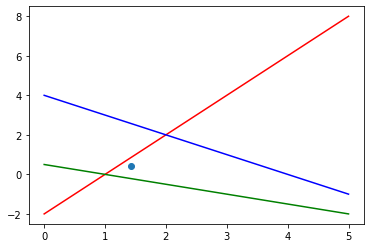

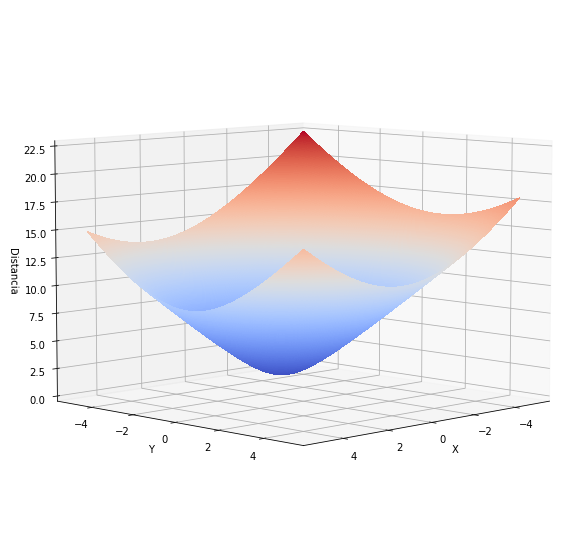

In [28]:
import numpy as np
import matplotlib.pyplot as plt

matriz_coeficientes = np.array([[2,-1],[1,2],[1,1]])
vector_solucion  = np.array([[2,1,4]])

eq1 = lambda x :2*x-2
eq2 = lambda x: (1-x)/2
eq3 = lambda x : 4-x

lista_valores = np.linspace(0,5,100)

def obtener_solucion(coeficientes, solucion, n):
    
    bT = solucion.T
    AT = np.dot(coeficientes.T, coeficientes)
    bT = coeficientes.T @ bT

    xsol = np.linalg.solve(AT, bT)
    
    return xsol

solucion = obtener_solucion(matriz_coeficientes, vector_solucion, 1)
print("Coordenadas de la solución (x, y):" , obtener_solucion(matriz_coeficientes, vector_solucion, 1))

plt.scatter(solucion[0], solucion[1])
plt.plot(lista_valores, eq1(lista_valores), color='red')
plt.plot(lista_valores, eq2(lista_valores), color='green')
plt.plot(lista_valores, eq3(lista_valores), color='blue')
figura = plt.figure(figsize=(10, 10))
eje = figura.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.03)
Y = np.arange(-5, 5, 0.03)
X, Y = np.meshgrid(X, Y)
eje.set_xlabel ("X")
eje.set_ylabel ("Y")
eje.set_zlabel ("Distancia")

distancia = np.sqrt((2*X-Y-2)**2+(X+2*Y-1)**2+(X+Y-4)**2) 
superficie = eje.plot_surface(X, Y, distancia, cmap = "coolwarm", rstride=1, cstride=1, linewidth=0, antialiased=False)
eje.set_zlim(0, 22.5)
eje.view_init(7,45) 
menor = 5
for i in range(len(distancia)):
    if min(distancia[i]) < menor:
        menor = min(distancia[i])


## Minimos Cuadrados
7)

File already exists.
Optimization terminated successfully.
         Current function value: 0.105012
         Iterations: 109
         Function evaluations: 202
 final_simplex: (array([[4.40086606, 0.97515686, 2.78201155],
       [4.40079454, 0.9751397 , 2.78207144],
       [4.40087258, 0.97515609, 2.78201596],
       [4.40090902, 0.97516572, 2.78206878]]), array([0.10501218, 0.10501218, 0.10501218, 0.10501219]))
           fun: 0.10501218414100094
       message: 'Optimization terminated successfully.'
          nfev: 202
           nit: 109
        status: 0
       success: True
             x: array([4.40086606, 0.97515686, 2.78201155])


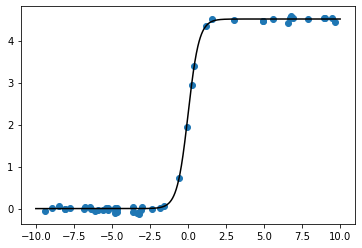

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import scipy.optimize as spo
import math
import wget

file_path = 'sigmoid_data.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

if not path.exists(file_path):
    file_path = wget.download(url, file_path)
else:
    print('File already exists.')

data = np.loadtxt(file_path, delimiter=",", skiprows=1)
x_values = data[:,0]
y_values = data[:,1]

def sigmoid_function(x, parameters):
    a, b, c = parameters 
    return a / (b + np.exp(-c*x))

def compute_chi_squared(parameters, x, y, model_function): 
    return np.sum((y - model_function(x, parameters))**2)

initial_parameters = np.array([1, 1, 1])

compute_chi_squared(initial_parameters, x_values, y_values, sigmoid_function)

result = spo.minimize(compute_chi_squared, initial_parameters, args=(x_values, y_values, sigmoid_function),
                      options={"disp":True}, method="Nelder-Mead")
print(result)

fitted_parameters = result.x
x_range = np.linspace(-10, 10, 1000)

plt.scatter(x_values, y_values)
plt.plot(x_range, sigmoid_function(x_range, fitted_parameters), color="k")
plt.show()

